# (coding) perceptron

### Question 12-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [14]:
#iris dataset from a CSV file
df = pd.read_csv('iris.csv', header=None)

In [15]:
# first 100 rows and the first two features
X = df.iloc[:100, [0, 1]].values

In [16]:
# Create the target array y
y = np.where(df.iloc[:100, 4].values == 'Iris-setosa', -1, 1)

In [17]:
print("First 5 rows of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

First 5 rows of X:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
First 5 values of y:
 [-1 -1 -1 -1 -1]


### Question - 12-2

In [20]:
class Perceptron():
    # initialize learning rate and number of iterations
    def __init__(self, lrate=0.1, no_iter=50):
        self.lrate = lrate
        self.no_iter = no_iter
    
    # using X & y, update ww parameters    
    def fit(self, X, y):      
        # initialize weights ww to random values (-1, 1)
        self.ww = [random.uniform(-1.0, 1.0) for _ in range(1 + X.shape[1])]
        # initialize list to keep track of errors per iteration
        self.list_errors = []

        # iterate over labeled dataset, updating weights for each feature accordingly
        for _ in range(self.no_iter):
            cur_error = 0  # to count errors in this iteration
            
            for xx, label in zip(X, y):
                # Compute the weighted sum (dot product) and add bias (self.ww[0])
                net_input = self.ww[0] + np.dot(xx, self.ww[1:])
                
                # Apply the step function to get the prediction (output)
                prediction = 1 if net_input >= 0 else -1

                # Calculate the error (difference between target and prediction)
                error = label - prediction
                
                # Update weights if there is an error (error != 0)
                if error != 0:
                    # Update each weight (including the bias term)
                    self.ww[0] += self.lrate * error  # update bias
                    for i in range(len(xx)):
                        self.ww[i + 1] += self.lrate * error * xx[i]  # update weights
                    
                    cur_error += 1  # increment error count

            # Append the error count for this iteration to list_errors
            self.list_errors.append(cur_error)

        return self


### Question 12-3

In [21]:
    def predict(self, X):
        # compute the net input
        net_input = self.net_input(X)
        # apply the step function
        return 1 if net_input >= 0 else -1


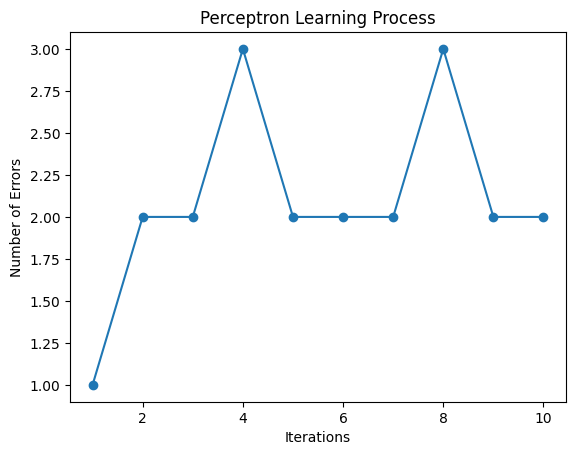

In [23]:
model = Perceptron(no_iter=10)
model.fit(X, y)

import matplotlib.pyplot as plt

plt.plot(range(1, len(model.list_errors) + 1), model.list_errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Process')
plt.show()


### Question 13-1

In [25]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Question 13-2

In [27]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Question 13-3

In [28]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features (x1, x2)
Y = np.array([[0], [1], [1], [0]])               # Target values

# Number of nodes in each layer
input_nodes = 2  # Number of input nodes
hidden_nodes = 2  # Number of hidden nodes
output_nodes = 1  # Number of output nodes


### Question 13-4

In [31]:
# Learning rate
lrate = 0.1

# Initialize weights for hidden and output layers
hidden_weights = np.random.uniform(0, 1, (input_nodes, hidden_nodes))
output_weights = np.random.uniform(0, 1, (hidden_nodes, output_nodes))

# Example forward pass (assuming hidden_output and output_output are calculated)
def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    return hidden_output, output_output

# Forward step
hidden_output, output_output = forward(X)

# Calculate error
error = Y - output_output

# Backpropagation: Update output layer weights
for j in range(output_nodes):
    for i in range(hidden_nodes):
        # Ensure you are indexing correctly for each sample
        # Here we assume this loop is running per each sample in X
        delta_wij = lrate * error[0][j] * output_output[0][j] * (1 - output_output[0][j]) * hidden_output[0][i]
        output_weights[i][j] += delta_wij


### Question 13-5

In [36]:
input_nodes = 2
hidden_nodes = 2
output_nodes = 1
lrate = 0.1

hidden_weights = np.random.uniform(0, 1, (input_nodes, hidden_nodes))
output_weights = np.random.uniform(0, 1, (hidden_nodes, output_nodes))

def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    return hidden_output, output_output

# Backpropagation step 
for sample_index in range(len(X)):  # Iterate through each sample
    # Forward step 
    hidden_output, output_output = forward(X[sample_index].reshape(1, -1))
    
    # Calculate error 
    error = Y[sample_index] - output_output

    # Calculate delta_k for the output layer
    for j in range(output_nodes):
        delta_k = error[0][j] * output_output[0][j] * (1 - output_output[0][j])
        
        # Backpropagation: Update weights for the hidden layer
        for i in range(input_nodes):
            # Calculate the change in weight (delta_wij) for the hidden layer weights
            delta_wij = -lrate * hidden_output[0][j] * (1 - hidden_output[0][j]) * delta_k * X[sample_index][i]
            hidden_weights[i][j] += delta_wij

In [42]:
no_iter = 1000 

for iter in range(no_iter):
    for sample_index in range(len(X)):
        hidden_output, output_output = forward(X[sample_index].reshape(1, -1))
        
        error = Y[sample_index] - output_output

    if iter % 100 == 0:
        print(f"Epoch {iter} Error is {np.mean(np.abs(error))}")

nn_output = forward(X)
print("Predicted output on training data:\n", nn_output)

Epoch 0 Error is 0.5448778198639046
Epoch 100 Error is 0.5448778198639046
Epoch 200 Error is 0.5448778198639046
Epoch 300 Error is 0.5448778198639046
Epoch 400 Error is 0.5448778198639046
Epoch 500 Error is 0.5448778198639046
Epoch 600 Error is 0.5448778198639046
Epoch 700 Error is 0.5448778198639046
Epoch 800 Error is 0.5448778198639046
Epoch 900 Error is 0.5448778198639046
Predicted output on training data:
 (array([[0.5       , 0.5       ],
       [0.6600004 , 0.6463246 ],
       [0.57438705, 0.62333381],
       [0.72373587, 0.75150313]]), array([[0.53078775],
       [0.54041676],
       [0.53601692],
       [0.54487782]]))


### Question 14

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]]) 

input_nodes = 2   
hidden_nodes = 2  
output_nodes = 2  


lrate = 0.1  # Learning rate
hidden_weights = np.random.uniform(0, 1, (input_nodes, hidden_nodes))
output_weights = np.random.uniform(0, 1, (hidden_nodes, output_nodes))


def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    return hidden_output, output_output


no_iter = 1000
for iter in range(no_iter):
    for sample_index in range(len(X)):
        hidden_output, output_output = forward(X[sample_index].reshape(1, -1))
        
        error = Y[sample_index] - output_output

        delta_k = error * output_output * (1 - output_output)

        for j in range(output_nodes):
            for i in range(hidden_nodes):
                delta_wij = lrate * delta_k[0][j] * hidden_output[0][i]
                output_weights[i][j] += delta_wij

        delta_j = hidden_output * (1 - hidden_output) * np.dot(delta_k, output_weights.T)

        for j in range(hidden_nodes):
            for i in range(input_nodes):
                delta_wij = lrate * delta_j[0][j] * X[sample_index][i]
                hidden_weights[i][j] += delta_wij

    if iter % 100 == 0:
        print(f"Epoch {iter} Error is {np.mean(np.abs(error))}")

_, nn_output = forward(X)
print("Predicted output on training data:\n", nn_output)


Epoch 0 Error is 0.5283990457496788
Epoch 100 Error is 0.5157362161295911
Epoch 200 Error is 0.5116351100721417
Epoch 300 Error is 0.5121900823221759
Epoch 400 Error is 0.51361107307745
Epoch 500 Error is 0.5154688909505069
Epoch 600 Error is 0.5177552162229478
Epoch 700 Error is 0.5204871584060745
Epoch 800 Error is 0.5236341700298565
Epoch 900 Error is 0.5270773892232341
Predicted output on training data:
 [[0.50958859 0.4923436 ]
 [0.46492498 0.53327738]
 [0.49104246 0.50971399]
 [0.4740104  0.52535224]]
